# Employee Turnover Analytics 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the HR dataset from a CSV file into a pandas DataFrame
data=pd.read_csv('HR_comma_sep.csv')

## 1. Perform data quality checks by checking for missing values, if any.

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
data.shape

(14999, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Check for missing values in the dataset
# This returns the count of null values for each column

data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

 - It is found that there are no missing values in the dataset.

## 2. Understand what factors contributed most to employee turnover at EDA.


### 2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data. 

Text(0.5, 1.0, 'Correlation Heatmap of Employee Data')

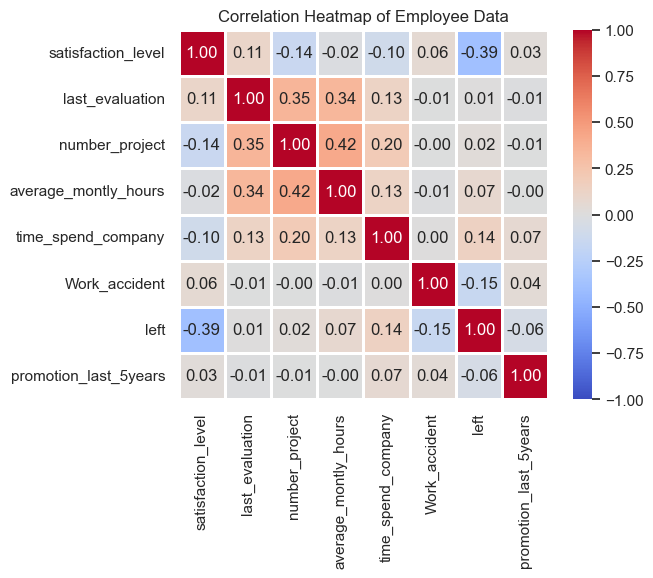

In [14]:
# Create a heatmap visualization of the correlation matrix

data_numeric=data.select_dtypes(include='number')
corr=data_numeric.corr()
sns.set(style='white')
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',linewidth=0.9,square=True,vmin=-1)
plt.title('Correlation Heatmap of Employee Data')


### 2.2 Draw the distribution plot

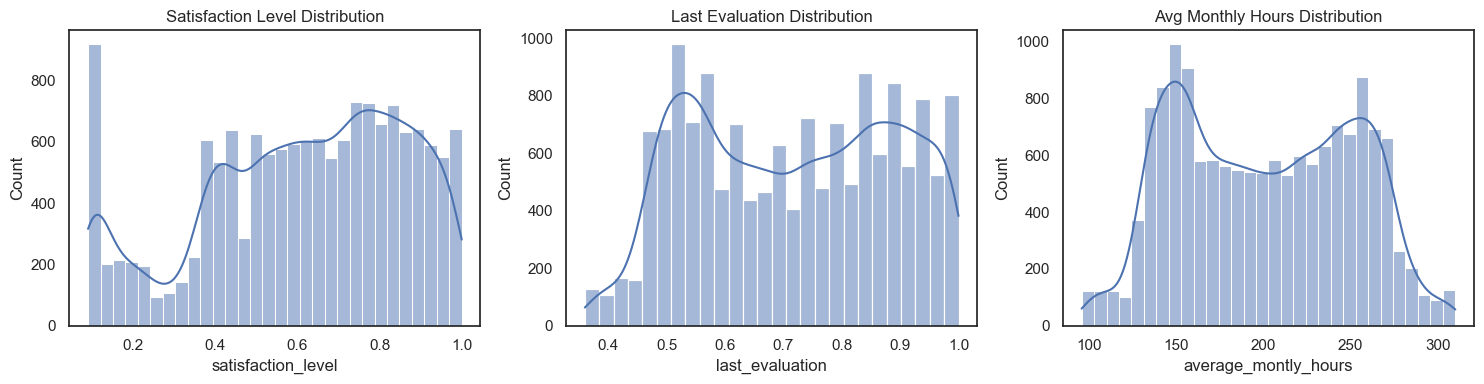

In [16]:
# Create a figure with 3 subplots arranged horizontally, with a width of 15 inches and height of 4 inches
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot histogram of satisfaction_level with kernel density estimate
sns.histplot(data['satisfaction_level'], ax=axs[0], kde=True)
axs[0].set_title('Satisfaction Level Distribution')

# Plot histogram of last_evaluation with kernel density estimate
sns.histplot(data['last_evaluation'], ax=axs[1], kde=True)
axs[1].set_title('Last Evaluation Distribution')

# Plot histogram of average_montly_hours with kernel density estimate
sns.histplot(data['average_montly_hours'], ax=axs[2], kde=True)
axs[2].set_title('Avg Monthly Hours Distribution')

plt.tight_layout()

 - From the above graphs we can see the count of employee's based on their satisfaction level, last evaluation, and average monthly hours spent in the office.

### 2.3 Draw the bar plot of the employee project count of both employees who left and stayed in the organization

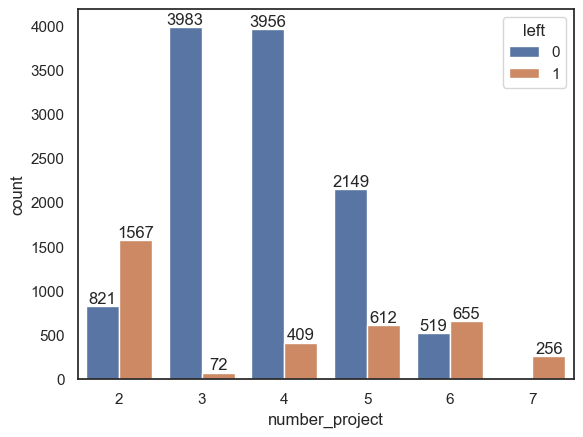

In [19]:
ax=sns.countplot(data=data,x='number_project',hue='left')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

 - According to the graph above, employees who completed three, four, or five projects had a lower turnover rate than those who completed fewer or more projects. Those who completed seven projects completely quit the firm. The number of people who departed the company after completing a single project was nearly double that of those who remained. Therefore, it is preferable to assign workers between three and five projects; three would be a good amount. 

# 3. Perform clustering of employees who left based on their satisfaction and evaluation. 

### 3.1 Choose columns satisfaction_level, last_evaluation, and left.

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [24]:
data.columns.unique()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [25]:
# Extract relevant features and target variable from the dataset
x=data[['satisfaction_level','last_evaluation','left']].values

# Initialize the StandardScaler to normalize the data
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x)

##### Using Elbow method to find the number of cluster (K)

In [27]:
values=[]
for k in range(2,31):
    km=KMeans(n_clusters=k ,random_state=42,n_init='auto')
    km.fit(x_scaled)
    values.append(km.inertia_)

In [28]:
km.inertia_ 

92.94011104696548

Text(0.5, 1.0, 'Elbow Method for Choosing K')

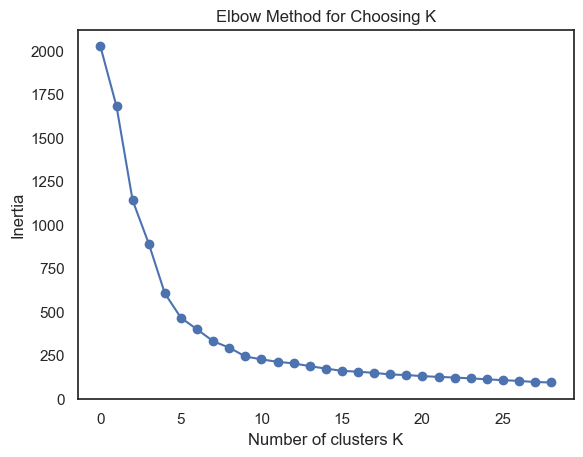

In [29]:
plt.plot(values, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing K')

 - We can deduce from the preceding graph that we can divide the three columns (left, satisfaction_level, and last_evaluation) into 15 appropriate clusters.

### 3.2 Do K-means clustering of employees who left the company into 3 clusters?

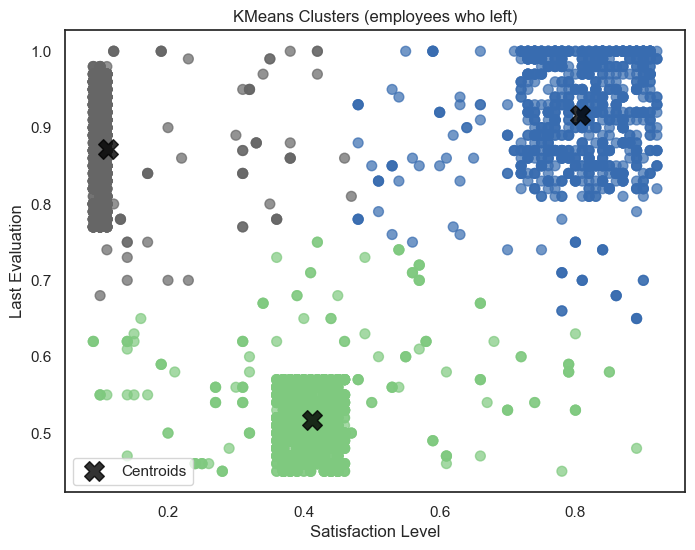

In [32]:
left_emp = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']].copy()    # Filter employees who left

# Normalize the data using MinMaxScaler
X = mms.fit_transform(left_emp)

# Initialize KMeans algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')     # K‑Means with 3 clusters
left_emp['cluster'] = kmeans.fit_predict(X)                       # Fit the model and assign cluster labels to each employee


plt.figure(figsize=(8, 6))     # Scatter plot in 2D
# Create scatter plot of employees colored by cluster assignment
plt.scatter(
    left_emp['satisfaction_level'],
    left_emp['last_evaluation'],
    c=left_emp['cluster'],
    cmap='Accent',    # Color map for different clusters
    s=50, alpha=0.7,  # Point size and transparency
)


# Plot the cluster centroids as X markers
plt.scatter(
    mms.inverse_transform(kmeans.cluster_centers_)[:, 0],  # Transform centroids back to original scale
    mms.inverse_transform(kmeans.cluster_centers_)[:, 1],
    c='black', marker='X', s=200, alpha=0.8,  # Black X markers for centroids
    label='Centroids'
)


plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('KMeans Clusters (employees who left)')
plt.legend()

 - The above graph illustrates the formation of three clusters using the KMeans algorithm, with each cluster's centroid also plotted.

### 3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

Based on their most recent evaluation and degree of job satisfaction, the aforementioned graph shows the employees who quit. Using the K-Means technique, the clusters were identified and divided into three groups.

 - Cluster 0(Black): Low satisfaction & High evaluation → “Disengaged high performer”

 - Cluster 1(Green): Medium satisfaction & Low evaluation → “Potential underperformers”

 - Cluster 2(Blue): High both → “High potential leavers”

# 4. Handle the left Class Imbalance using the SMOTE technique.

### 4.1. Pre-process the data by converting categorical columns to numerical columns by:

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
df=data.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [40]:
df_dummies=pd.get_dummies(data[['sales','salary']],drop_first=True,dtype=int)
df_dummies.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [41]:
# Combine the original dataframe (excluding 'sales' and 'salary' columns) with the dummy variables

df_final=pd.concat([df.drop(columns=['sales','salary']),df_dummies],axis=1)
df_final.head()  

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### 4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123. 

In [95]:
from sklearn.model_selection import train_test_split


X = df_final.drop(columns='left')  # Features: all columns except 'left'
y = df_final['left']               # Target: employee attrition status

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                  # Input features and target variable
    test_size=0.2,         # Use 20% of data for testing
    random_state=123,      # Set seed for reproducibility
    stratify=y             # Maintain class distribution in both sets
)

# Verify that class proportions are maintained in train and test sets
print("Original class proportions:", np.bincount(y) / len(y))
print("Train class proportions:   ", np.bincount(y_train) / len(y_train))
print("Test class proportions:    ", np.bincount(y_test) / len(y_test))

Original class proportions: [0.76191746 0.23808254]
Train class proportions:    [0.76189682 0.23810318]
Test class proportions:     [0.762 0.238]


### 4.3 Upsample the train dataset using the SMOTE technique from the imblearn module.

In [45]:
from imblearn.over_sampling import SMOTE

# Load data
X = df_final.drop(columns='left')
y = df_final['left']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=123,
    stratify=y
)

print("Before SMOTE:", y_train.value_counts())

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("After SMOTE:", pd.Series(y_train_resampled).value_counts()) 

Before SMOTE: left
0    9142
1    2857
Name: count, dtype: int64
After SMOTE: left
0    9142
1    9142
Name: count, dtype: int64


# 5. Perform 5-fold cross-validation model training and evaluate performance.

### 5.1 Train a logistic regression model, apply a 5-fold CV, and plot the classification report. 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     11428
           1       0.52      0.36      0.43      3571

    accuracy                           0.77     14999
   macro avg       0.67      0.63      0.64     14999
weighted avg       0.75      0.77      0.75     14999



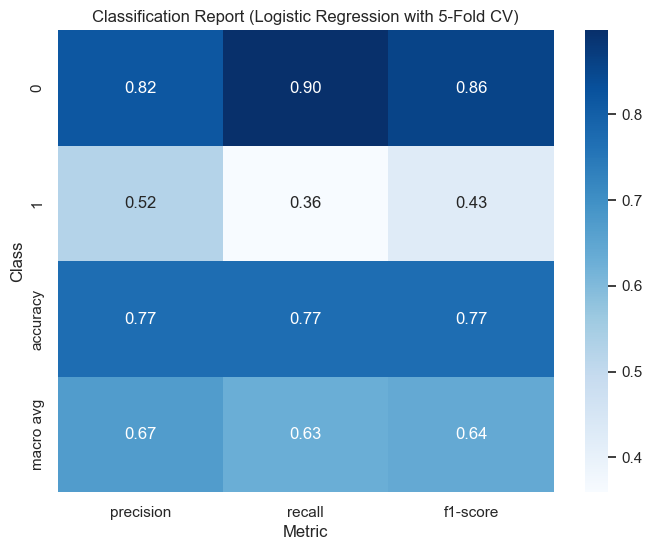

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

df2=data.copy()
df2_dummies=pd.get_dummies(df2[['sales','salary']],drop_first=True,dtype=int)
df2_final=pd.concat([df2.drop(columns=['sales','salary']),df2_dummies],axis=1)
df2_final.head()

x=df2_final.drop(columns='left')
y=df2_final['left']

df2_final.shape

mms=MinMaxScaler()

df2_scaled=mms.fit_transform(x)
pd.DataFrame(df2_scaled).head()

lr= LogisticRegression(max_iter=1000)          # Initialize Logistic Regression model with increased max_iter to ensure convergence


df2_cv=cross_val_predict(lr,df2_scaled,y,cv=5)        # Perform 5-fold cross-validation and get predictions


# Convert classification report to DataFrame for visualization
report_dict = classification_report(y, df2_cv, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

print(classification_report(y, df2_cv))

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report (Logistic Regression with 5-Fold CV)")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.show()

### 5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report. 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11428
           1       0.99      0.97      0.98      3571

    accuracy                           0.99     14999
   macro avg       0.99      0.98      0.99     14999
weighted avg       0.99      0.99      0.99     14999



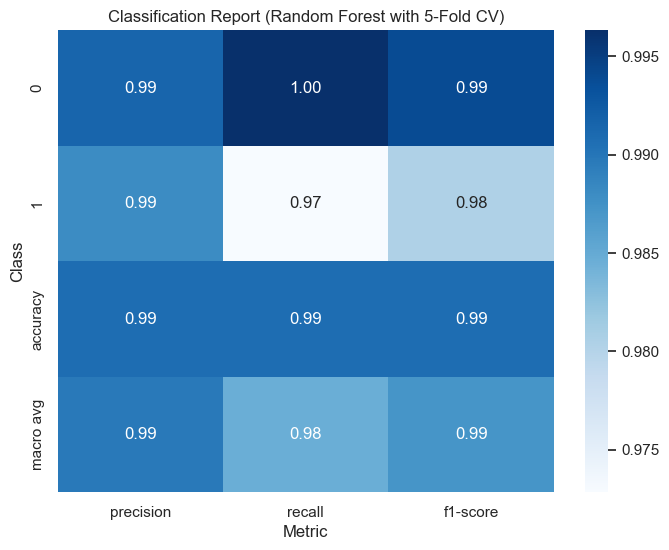

In [50]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

df2=data.copy()
df2_dummies=pd.get_dummies(df2[['sales','salary']],drop_first=True,dtype=int)
df2_final=pd.concat([df2.drop(columns=['sales','salary']),df2_dummies],axis=1)
df2_final.head()

x=df2_final.drop(columns='left')
y=df2_final['left']

df2_final.shape

mms=MinMaxScaler()

df2_scaled=mms.fit_transform(x)
pd.DataFrame(df2_scaled).head()

rf=RandomForestClassifier()

df2_cv=cross_val_predict(rf,df2_scaled,y,cv=5)

report_dict = classification_report(y, df2_cv, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

print(classification_report(y, df2_cv))

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report (Random Forest with 5-Fold CV)")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.show()

### 5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11428
           1       0.96      0.93      0.94      3571

    accuracy                           0.97     14999
   macro avg       0.97      0.96      0.96     14999
weighted avg       0.97      0.97      0.97     14999



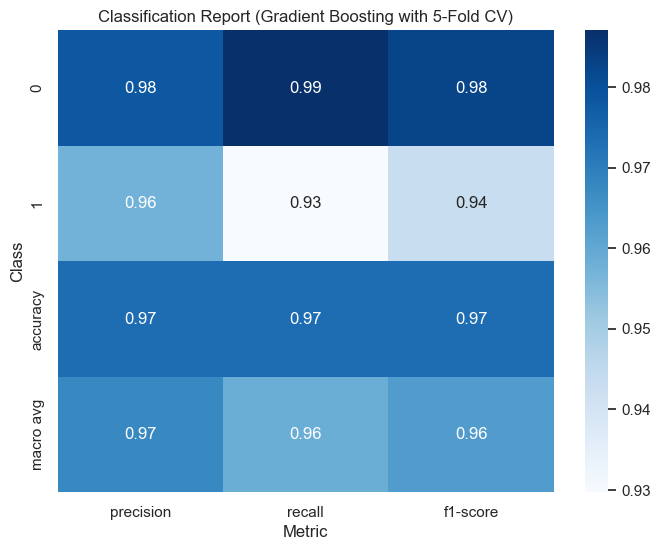

In [52]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

df2=data.copy()
df2_dummies=pd.get_dummies(df2[['sales','salary']],drop_first=True,dtype=int)
df2_final=pd.concat([df2.drop(columns=['sales','salary']),df2_dummies],axis=1)
df2_final.head()

x=df2_final.drop(columns='left')
y=df2_final['left']

df2_final.shape

mms=MinMaxScaler()

df2_scaled=mms.fit_transform(x)
pd.DataFrame(df2_scaled).head()

gb=GradientBoostingClassifier()

df2_cv=cross_val_predict(gb,df2_scaled,y,cv=5)

report_dict = classification_report(y, df2_cv, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

print(classification_report(y, df2_cv))

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report (Gradient Boosting with 5-Fold CV)")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.show()

# 6. Identify the best model and justify the evaluation metrics used.

### 6.1 Find the ROC/AUC for each model and plot the ROC curve. 

AUC Score: 0.99


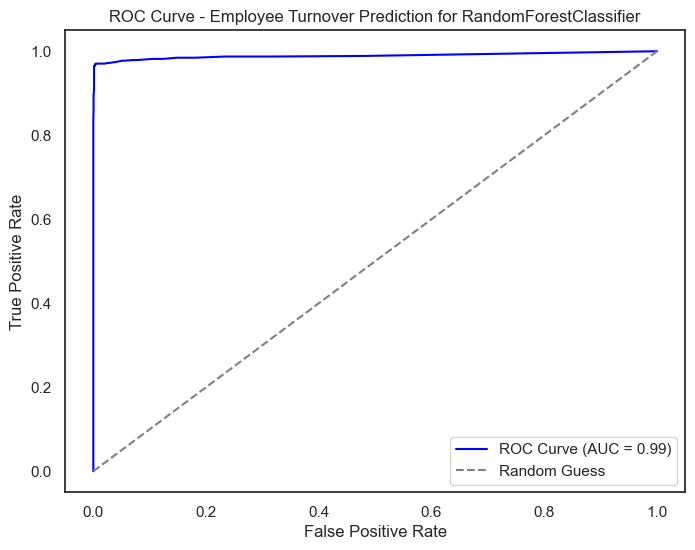

AUC Score: 0.97


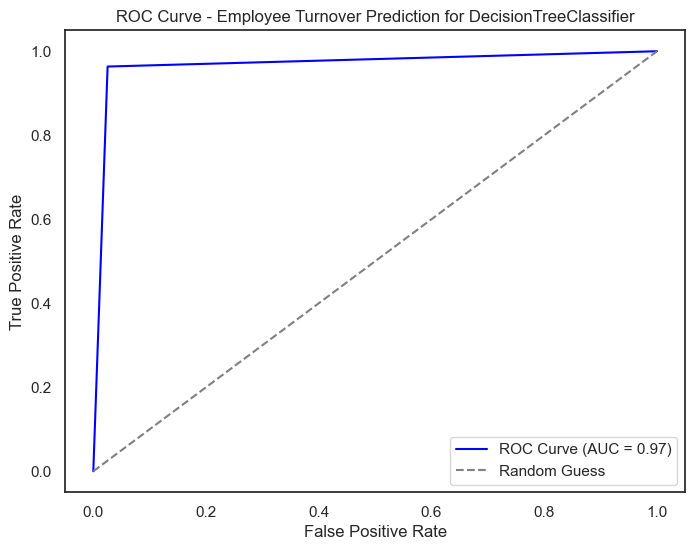

AUC Score: 0.82


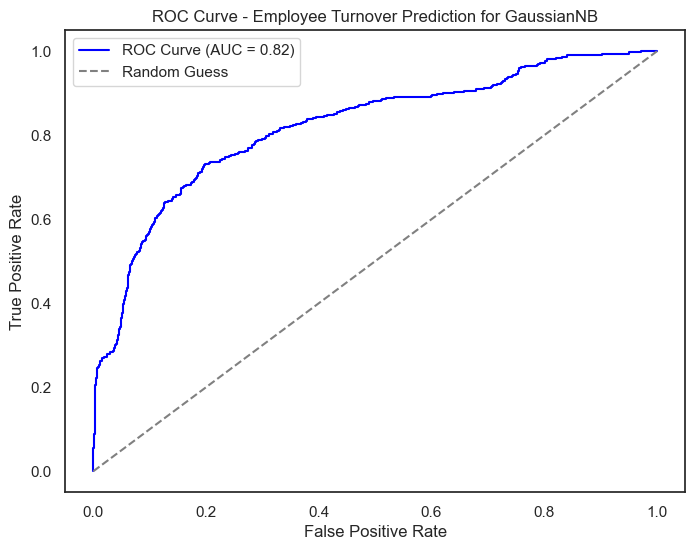

AUC Score: 0.97


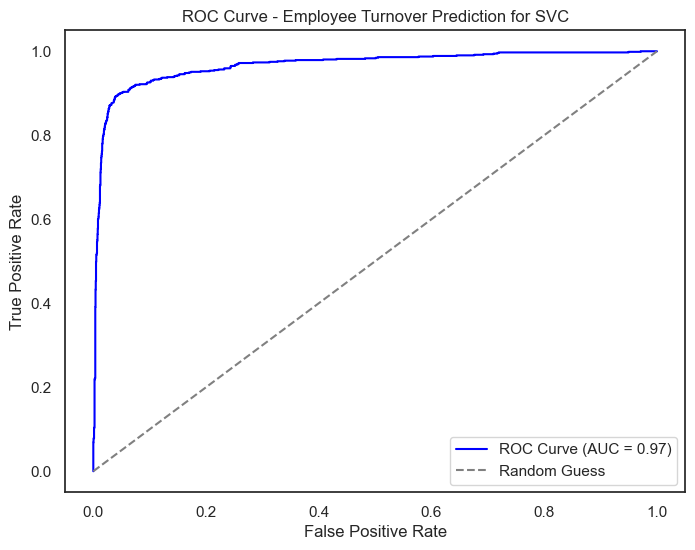

AUC Score: 0.97


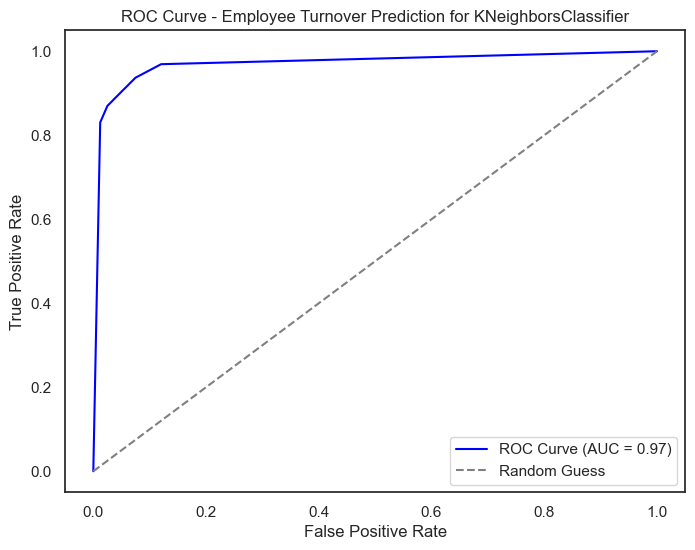

AUC Score: 0.83


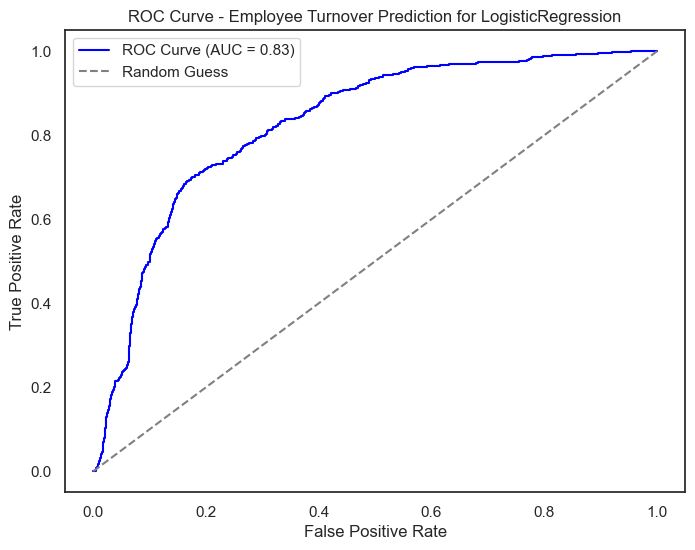

C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AUC Score: 0.98


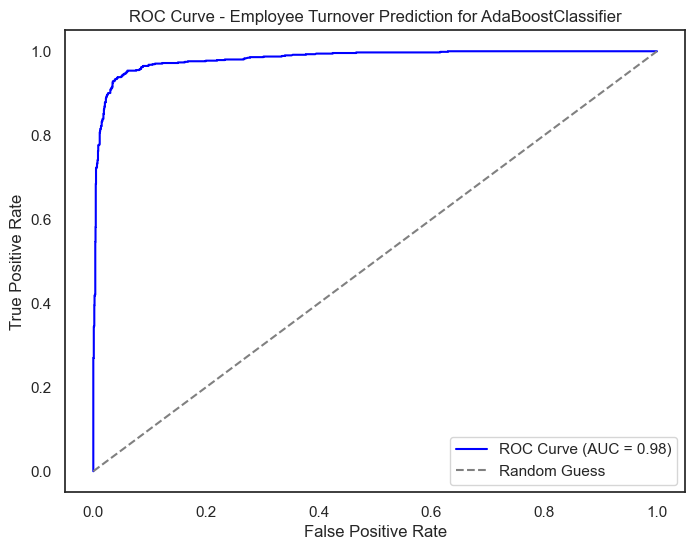

AUC Score: 0.99


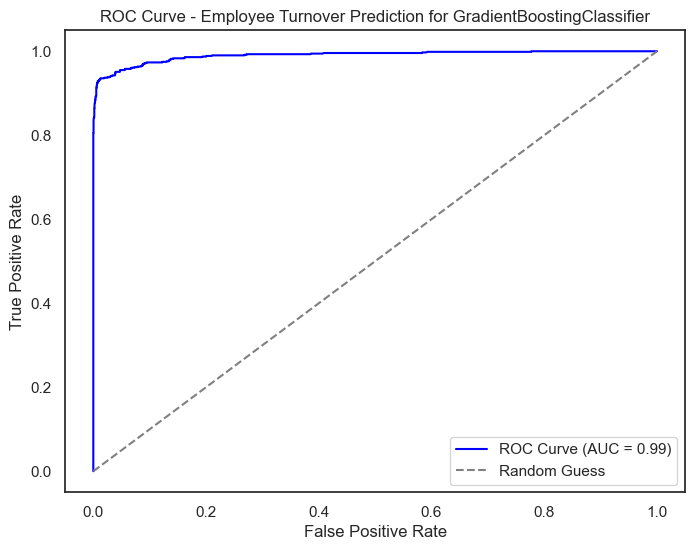

AUC Score: 0.99


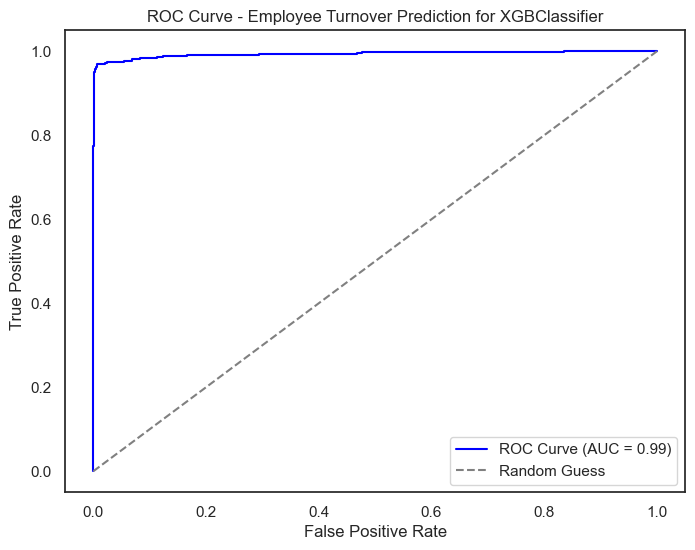

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df3=data.copy()
df3_dummies=pd.get_dummies(df3[['sales','salary']],drop_first=True,dtype=int)
df3_final=pd.concat([df3.drop(columns=['sales','salary']),df3_dummies],axis=1)


# Define features (X) and target variable (y)
X = data.drop(columns=['left'])
y = data['left']


mms=MinMaxScaler()
X_scaled=mms.fit_transform(x)


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Initialize various classification models
rf = RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier()
nb=GaussianNB()
svc=SVC(probability=True)
knn=KNeighborsClassifier()
lr= LogisticRegression(max_iter=1000)
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()


# Create lists to store models and their names for iteration
ml1=[rf,dt,nb,svc,knn,lr,ada,gb,xgb]
topic1=['RandomForestClassifier','DecisionTreeClassifier','GaussianNB','SVC','KNeighborsClassifier','LogisticRegression','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']


for ml,topic in zip(ml1,topic1):
    ml.fit(X_train, y_train)

    y_probs = ml.predict_proba(X_test)[:, 1]     # Predict probabilities

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    print(f"AUC Score: {auc_score:.2f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Employee Turnover Prediction for {topic}")
    plt.legend()
    plt.show()


### 6.2 Find the confusion matrix for each of the models. 

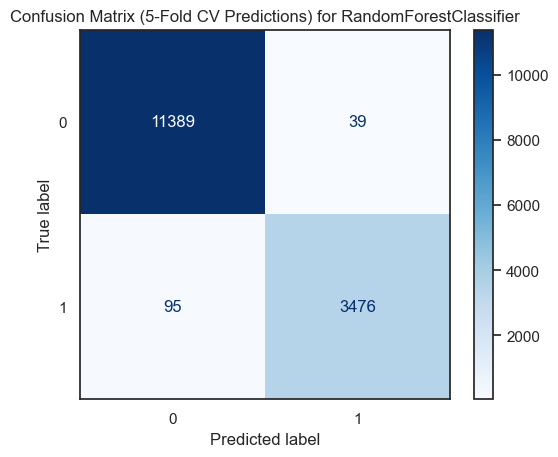

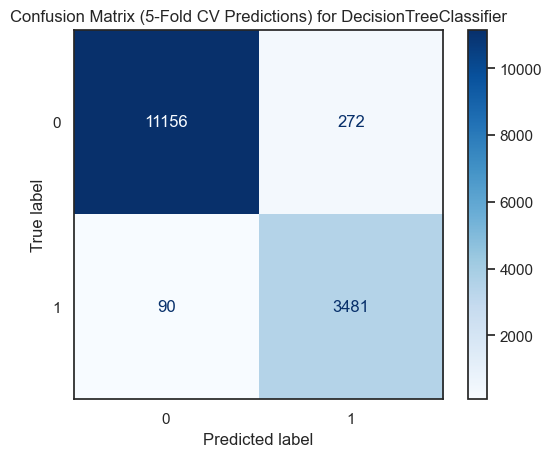

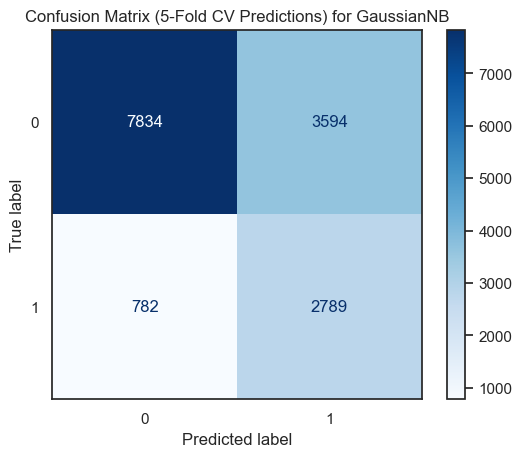

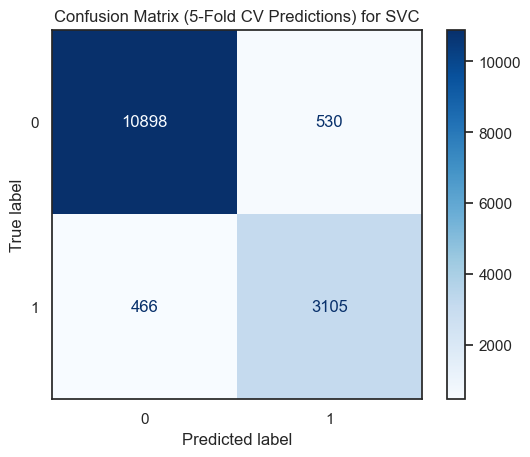

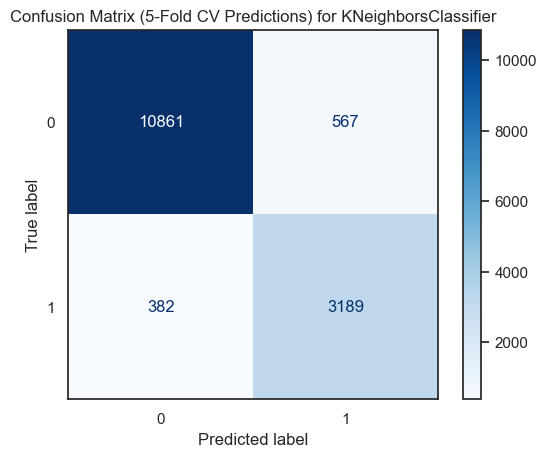

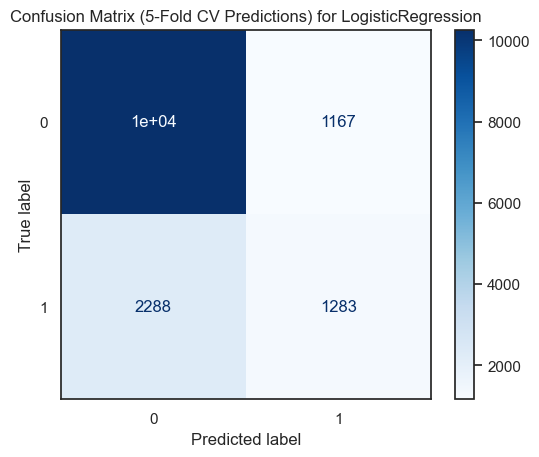

C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

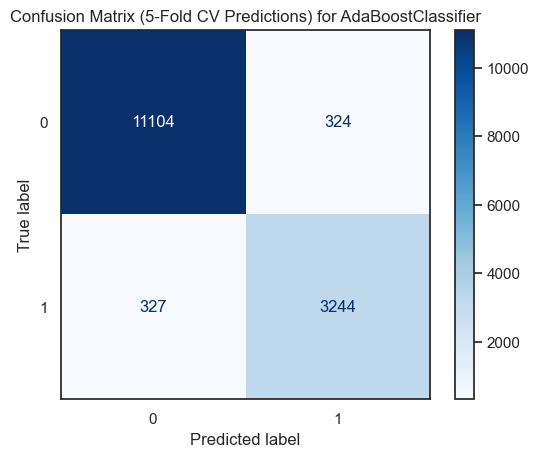

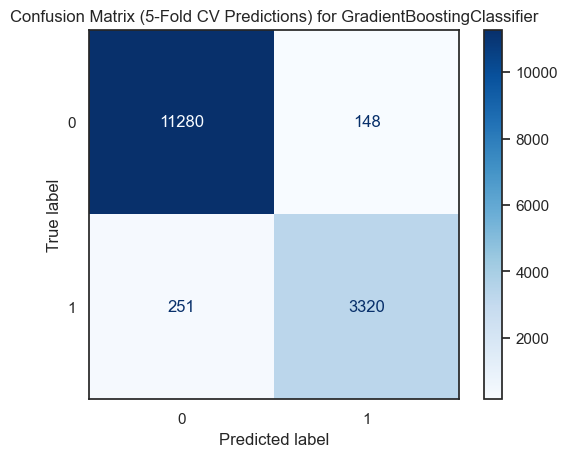

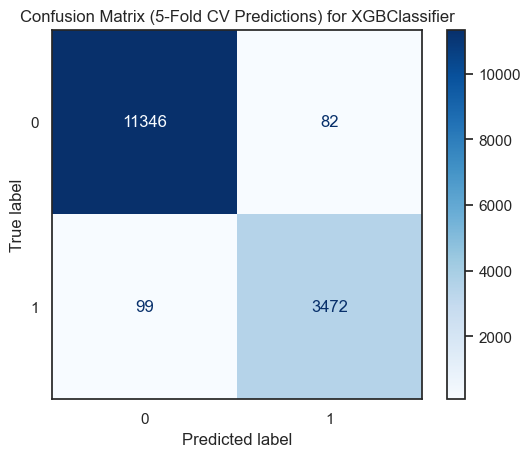

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

df=data.copy()
df2_dummies=pd.get_dummies(df2[['sales','salary']],drop_first=True,dtype=int)
df2_final=pd.concat([df2.drop(columns=['sales','salary']),df2_dummies],axis=1)
df2_final.head()

x=df2_final.drop(columns='left')
y=df2_final['left']

df2_final.shape

mms=MinMaxScaler()

df2_scaled=mms.fit_transform(x)
pd.DataFrame(df2_scaled).head()


# Initialize different classification models
rf = RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier()
nb=GaussianNB()
svc=SVC(probability=True)
knn=KNeighborsClassifier()
lr= LogisticRegression(max_iter=1000)
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()


# Create lists of models and their names for iteration
ml1=[rf,dt,nb,svc,knn,lr,ada,gb,xgb]
topic1=['RandomForestClassifier','DecisionTreeClassifier','GaussianNB','SVC','KNeighborsClassifier','LogisticRegression','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']


# Loop through each model, perform 5-fold cross-validation, and display confusion matrix
for ml,topic in zip(ml1,topic1):
    df2_cv=cross_val_predict(ml,df2_scaled,y,cv=5)

    # Create and display confusion matrix
    cm = confusion_matrix(y, df2_cv)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix (5-Fold CV Predictions) for {topic}")
    plt.show()

### 6.3 Explain which metric needs to be used from the confusion matrix: Recall or Precision?

 - The goal is to identify as many employees at risk of leaving as possible, even if it means flagging some who would have stayed (false positives). Missing an actual at-risk employee (a false negative) means losing valuable talent without warning or intervention. By maximizing recall, HR can proactively engage with these employees through retention strategies, training, or incentives to reduce turnover. While precision also matters to avoid wasting resources on low-risk employees, organizations usually prioritize high recall to minimize costly and disruptive unexpected resignations.

# 7. Suggest various retention strategies for targeted employees.

### 7.1 Using the best model, predict the probability of employee turnover in the test data.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

df7 = data.copy()

df7_dummies = pd.get_dummies(df7[['sales','salary']],drop_first=True)
df7_final = pd.concat([df7.drop(columns=['sales','salary']),df7_dummies],axis=1)

x = df7_final.drop(columns='left')
y = df7_final['left']

mms=MinMaxScaler()
df7_scaled=mms.fit_transform(x)
pd.DataFrame(df7_scaled)

x_train,x_test,y_train,y_test=train_test_split(df7_scaled,y,test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

# Predict the probability of employee turnover for the test set
turnover_probs = rf.predict_proba(X_test)[:, 1]

results = pd.DataFrame({
    'Employee_Index': range(X_test.shape[0]),
    'Turnover_Probability': turnover_probs
})


# Define a function to categorize employees into risk zones based on turnover probability
def assign_zone(prob):
    if prob < 0.20:
        return 'Green - Safe'
    elif prob < 0.60:
        return 'Yellow - Low Risk'
    elif prob < 0.90:
        return 'Orange - Medium Risk'
    else:
        return 'Red - High Risk'

# Apply the risk zone categorization to each employee
results['Risk_Zone'] = results['Turnover_Probability'].apply(assign_zone)

print(results.head(10))

   Employee_Index  Turnover_Probability        Risk_Zone
0               0                  0.03     Green - Safe
1               1                  0.00     Green - Safe
2               2                  0.00     Green - Safe
3               3                  0.00     Green - Safe
4               4                  0.00     Green - Safe
5               5                  0.00     Green - Safe
6               6                  0.13     Green - Safe
7               7                  1.00  Red - High Risk
8               8                  0.01     Green - Safe
9               9                  0.01     Green - Safe


### 7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone. 

 - Safe Zone (Green) (Score < 20%)
These employees have a very low predicted probability (<20%) of leaving. They are generally satisfied, well-engaged, and likely loyal. For this group, companies can maintain standard engagement efforts—recognition programs, regular feedback, and opportunities for skill development.

 - Low-Risk Zone (Yellow) (20% < Score < 60%)
These employees show some early signs of potential turnover. They are not immediately at risk but could become so if ignored. HR should focus on preventive strategies, like conducting pulse surveys to understand emerging concerns, offering targeted professional development, and ensuring managers hold regular 1:1 check-ins. By identifying and addressing small issues early, companies can prevent them from escalating.

 - Medium-Risk Zone (Orange) (60% < Score < 90%)
These employees are moderately likely to leave and require more focused attention. HR and managers should consider personalized retention plans, such as career-path discussions, compensation reviews, flexible work options, or mentorship programs. Conducting stay interviews to uncover specific dissatisfaction drivers is important. The goal here is to demonstrate commitment to the employee’s growth and well-being before they make a firm decision to exit.

- High-Risk Zone (Red) (Score > 90%)
This group is very likely to leave soon without intervention. Immediate, intensive retention efforts are critical. Strategies could include urgent one-on-one meetings to understand root causes, resolving conflicts, offering tailored incentives, or fast-tracking promotions or role changes if justified. Even so, companies should also prepare for potential turnover by planning succession, knowledge transfer, or recruitment pipelines. Managing this group proactively can reduce costly unplanned attrition.
